<a href="https://colab.research.google.com/github/barauna-lo/phd_thesis/blob/main/EtaTest_for_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
 !pip install ordpy wurlitzer Pillow

In [ ]:


#!pip install git+https://github.com/rsautter/gpa/
!pip install git+https://github.com/barauna-lo/GPA.git

  Cloning https://github.com/barauna-lo/GPA.git to /tmp/pip-req-build-chn5t7ru
  Running command git clone --filter=blob:none --quiet https://github.com/barauna-lo/GPA.git /tmp/pip-req-build-chn5t7ru
  Resolved https://github.com/barauna-lo/GPA.git to commit 2c011bb317699305375b9847baf7a6f4509c0b4c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.5-cp310-cp310-linux_x86_64.whl size=1514486 sha256=e7095f13772fc98f2a5da2a2f97b8dc6260aee5e2222bd321818f26ea730864d
  Stored in directory: /tmp/pip-ephem-wheel-cache-u3gfpznl/wheels/4f/03/b6/742740ea73d4aa456120dd559208a4f8dc874802578ef46d55
Successfully built GPA


In [ ]:
# !pip install wurlitzer
!git clone https://github.com/rsautter/pyJHTDB
!pip install --log log.txt pyJHTDB/.

Cloning into 'pyJHTDB'...
remote: Enumerating objects: 1459, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1459 (delta 85), reused 125 (delta 69), pack-reused 1295
Receiving objects: 100% (1459/1459), 7.45 MiB | 21.07 MiB/s, done.
Resolving deltas: 100% (870/870), done.
Processing ./pyJHTDB
  Preparing metadata (setup.py) ... done
  Created wheel for pyJHTDB: filename=pyJHTDB-20210108.0-cp310-cp310-linux_x86_64.whl size=1108420 sha256=e760a016c3483bb1965ecc0ba00aa6192a0bad42bd6e1b288bf92ff284d9ca0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-60dr776z/wheels/f2/4a/52/39095551bf3f3e0499a222133018c7d4e11173593eb3c88d1f
Successfully built pyJHTDB


In [ ]:
!pip install --force-reinstal git+https://github.com/rsautter/eta/

  Cloning https://github.com/rsautter/eta/ to /tmp/pip-req-build-5ze986o2
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/eta/ /tmp/pip-req-build-5ze986o2
  Resolved https://github.com/rsautter/eta/ to commit 81333087bbf2fc5427b4152e20e4f444d7bc2764
  Preparing metadata (setup.py) ... done
  Created wheel for Eta: filename=Eta-0.1-py3-none-any.whl size=15117 sha256=674d09e5a832af6d1bf8bb66a58cf05a5cab70cebcb5768d993978adbbcd13cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-facf1qx0/wheels/be/e5/6a/f34013f615a3379f8419799e352c823927e6d8decfebf50307
Successfully built Eta


In [ ]:
!pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

  Cloning https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to /tmp/pip-req-build-vsrs5cew
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau /tmp/pip-req-build-vsrs5cew
  Resolved https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to commit 98d6a3a85e19e5c0e80d41e297dec6afd4a18d69
  Preparing metadata (setup.py) ... done
  Created wheel for NCGL: filename=NCGL-0.1-py3-none-any.whl size=18850 sha256=c0632033aa2329093c369d8571fd45e11e816745f26cbca5f59dbf20e9bdcaea
  Stored in directory: /tmp/pip-ephem-wheel-cache-2v7s1q_6/wheels/bc/92/12/b3ad30c00cc629588178c0455936a8ec81bc775213bae2bb70
Successfully built NCGL


In [ ]:
# !pip install Pillow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import inset_locator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import cv2
import NCGL
import eta
import tqdm
import pyJHTDB
from pyJHTDB.dbinfo import mhd1024, isotropic1024coarse
from pyJHTDB import libJHTDB
from ordpy import *
from GPA import GPA
import glob
from PIL import Image



# Functions

In [ ]:
def readMod(i):
  dx = pd.read_csv(f'ux_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dy = pd.read_csv(f'uy_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dz = pd.read_csv(f'uz_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  return np.sqrt(dx**2+dy**2+dz**2)

def getJHTDBIso(timeIndex,size=64):
  lJHTDB = libJHTDB()
  lJHTDB.initialize()
  auth_token  = "edu.jhu.pha.turbulence.testing-201311"  #Replace with your own token here
  lJHTDB.add_token(auth_token)
  t = np.linspace(0, 10, size)
  x = np.zeros((size, size, 3), np.float32)
  x[:, :, 0] = np.linspace(0, 1, size)[np.newaxis, :]
  x[:, :, 1] = np.linspace(0, 1, size)[:, np.newaxis]
  x[:, :, 2] = 0.5
  data = lJHTDB.getData(t[timeIndex],x,sinterp = 4, getFunction='getVelocity')
  lJHTDB.finalize()
  return np.sqrt(data[:,:,0]**2+data[:,:,1]**2+data[:,:,2]**2)

# Data

## Pencil

In [ ]:
!gdown 1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL

Downloading...
From: https://drive.google.com/uc?id=1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL
To: /content/simulaturb_Erico_Rempel_ITA.zip
100% 1.69M/1.69M [00:00<00:00, 132MB/s]


In [ ]:
!unzip  simulaturb_Erico_Rempel_ITA.zip

Archive:  simulaturb_Erico_Rempel_ITA.zip
  inflating: ux_1.dat                
  inflating: ux_2.dat                
  inflating: ux_3.dat                
  inflating: ux_4.dat                
  inflating: ux_5.dat                
  inflating: ux_6.dat                
  inflating: ux_7.dat                
  inflating: ux_8.dat                
  inflating: ux_9.dat                
  inflating: ux_10.dat               
  inflating: ux_11.dat               
  inflating: ux_12.dat               
  inflating: ux_13.dat               
  inflating: ux_14.dat               
  inflating: ux_15.dat               
  inflating: ux_16.dat               
  inflating: ux_17.dat               
  inflating: ux_18.dat               
  inflating: ux_19.dat               
  inflating: ux_20.dat               
  inflating: ux_21.dat               
  inflating: ux_22.dat               
  inflating: ux_23.dat               
  inflating: ux_24.dat               
  inflating: ux_25.dat               
  inflat

## CGL 3D

In [ ]:
!gdown 1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k

Downloading...
From: https://drive.google.com/uc?id=1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k
To: /content/data.zip
100% 22.9M/22.9M [00:00<00:00, 45.1MB/s]


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/s27.txt            
  inflating: data/s0.txt             
  inflating: data/s1.txt             
  inflating: data/s2.txt             
  inflating: data/s3.txt             
  inflating: data/s4.txt             
  inflating: data/s5.txt             
  inflating: data/s6.txt             
  inflating: data/s7.txt             
  inflating: data/s8.txt             
  inflating: data/s9.txt             
  inflating: data/s10.txt            
  inflating: data/s11.txt            
  inflating: data/s12.txt            
  inflating: data/s13.txt            
  inflating: data/s14.txt            
  inflating: data/s15.txt            
  inflating: data/s16.txt            
  inflating: data/s17.txt            
  inflating: data/s18.txt            
  inflating: data/s19.txt            
  inflating: data/s20.txt            
  inflating: data/s21.txt            
  inflating: data/s22.txt            
  inflating: data/s23.txt            
  inflating:

In [ ]:
snap = []
for i in range(500):
  snap.append(pd.read_csv(f'data/s{i}.txt', header=None, delimiter='\s+').to_numpy())

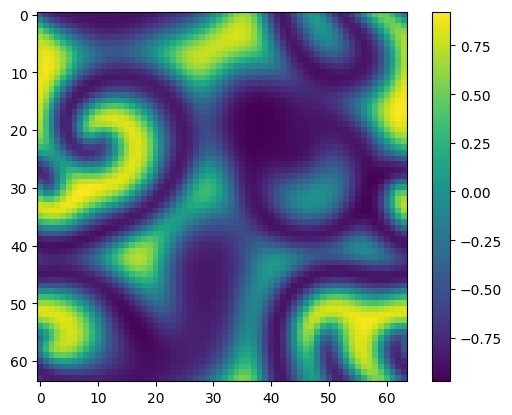

In [ ]:
plt.figure()
plt.imshow(snap[-490])
plt.colorbar()
plt.show()

-1.7637478711792083


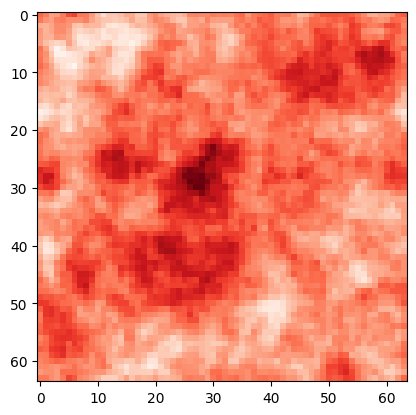

In [ ]:
m = NCGL.cNoise(2,[64,64,64])
print(eta.entropy(m)["Spectral_PowerlawTsallis"])
plt.figure()
image2 = m[1]
plt.imshow(image2,cmap='Reds')

#plt.colorbar()
plt.show()

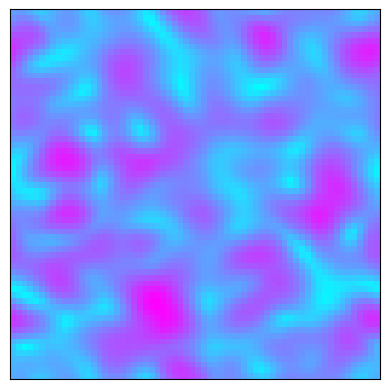

In [ ]:
plt.figure()
plt.imshow(readMod(5),cmap='cool')

plt.xticks([])
plt.yticks([])
plt.show()

## Turbulence

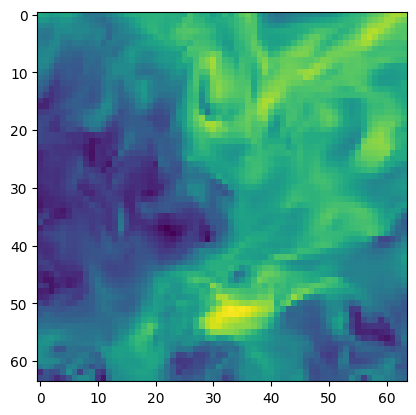

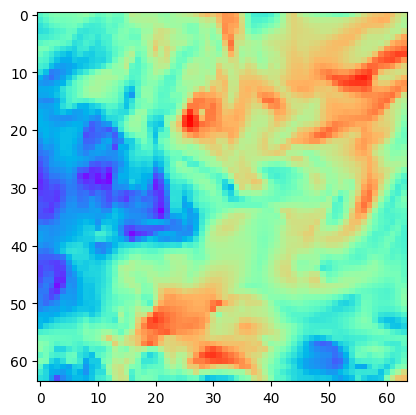

In [ ]:
data = getJHTDBIso(24)
plt.figure()
plt.imshow(data)
data = getJHTDBIso(25)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.show()

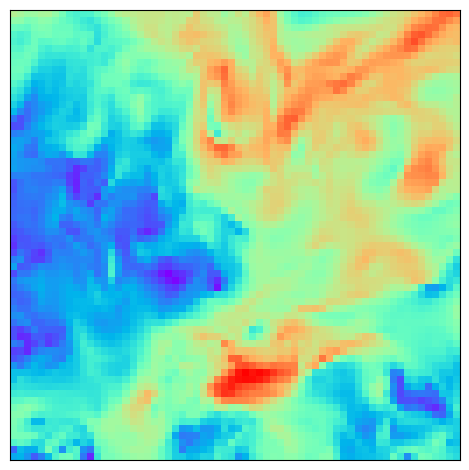

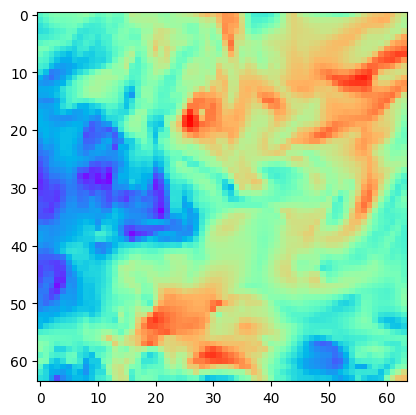

In [ ]:
data = getJHTDBIso(24)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
data = getJHTDBIso(25)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.show()

## Plot all systems

In [ ]:
!gdown 1QIOdqzrG0sFKa2ZDzNHyihCXjLtMCubD

Downloading...
From: https://drive.google.com/uc?id=1QIOdqzrG0sFKa2ZDzNHyihCXjLtMCubD
To: /content/snapEvol.zip
100% 230k/230k [00:00<00:00, 81.0MB/s]


In [ ]:
!unzip snapEvol.zip

Archive:  snapEvol.zip
   creating: snapEvol/
  inflating: snapEvol/s0.csv         
  inflating: snapEvol/s1.csv         
  inflating: snapEvol/s2.csv         
  inflating: snapEvol/s3.csv         
  inflating: snapEvol/s4.csv         


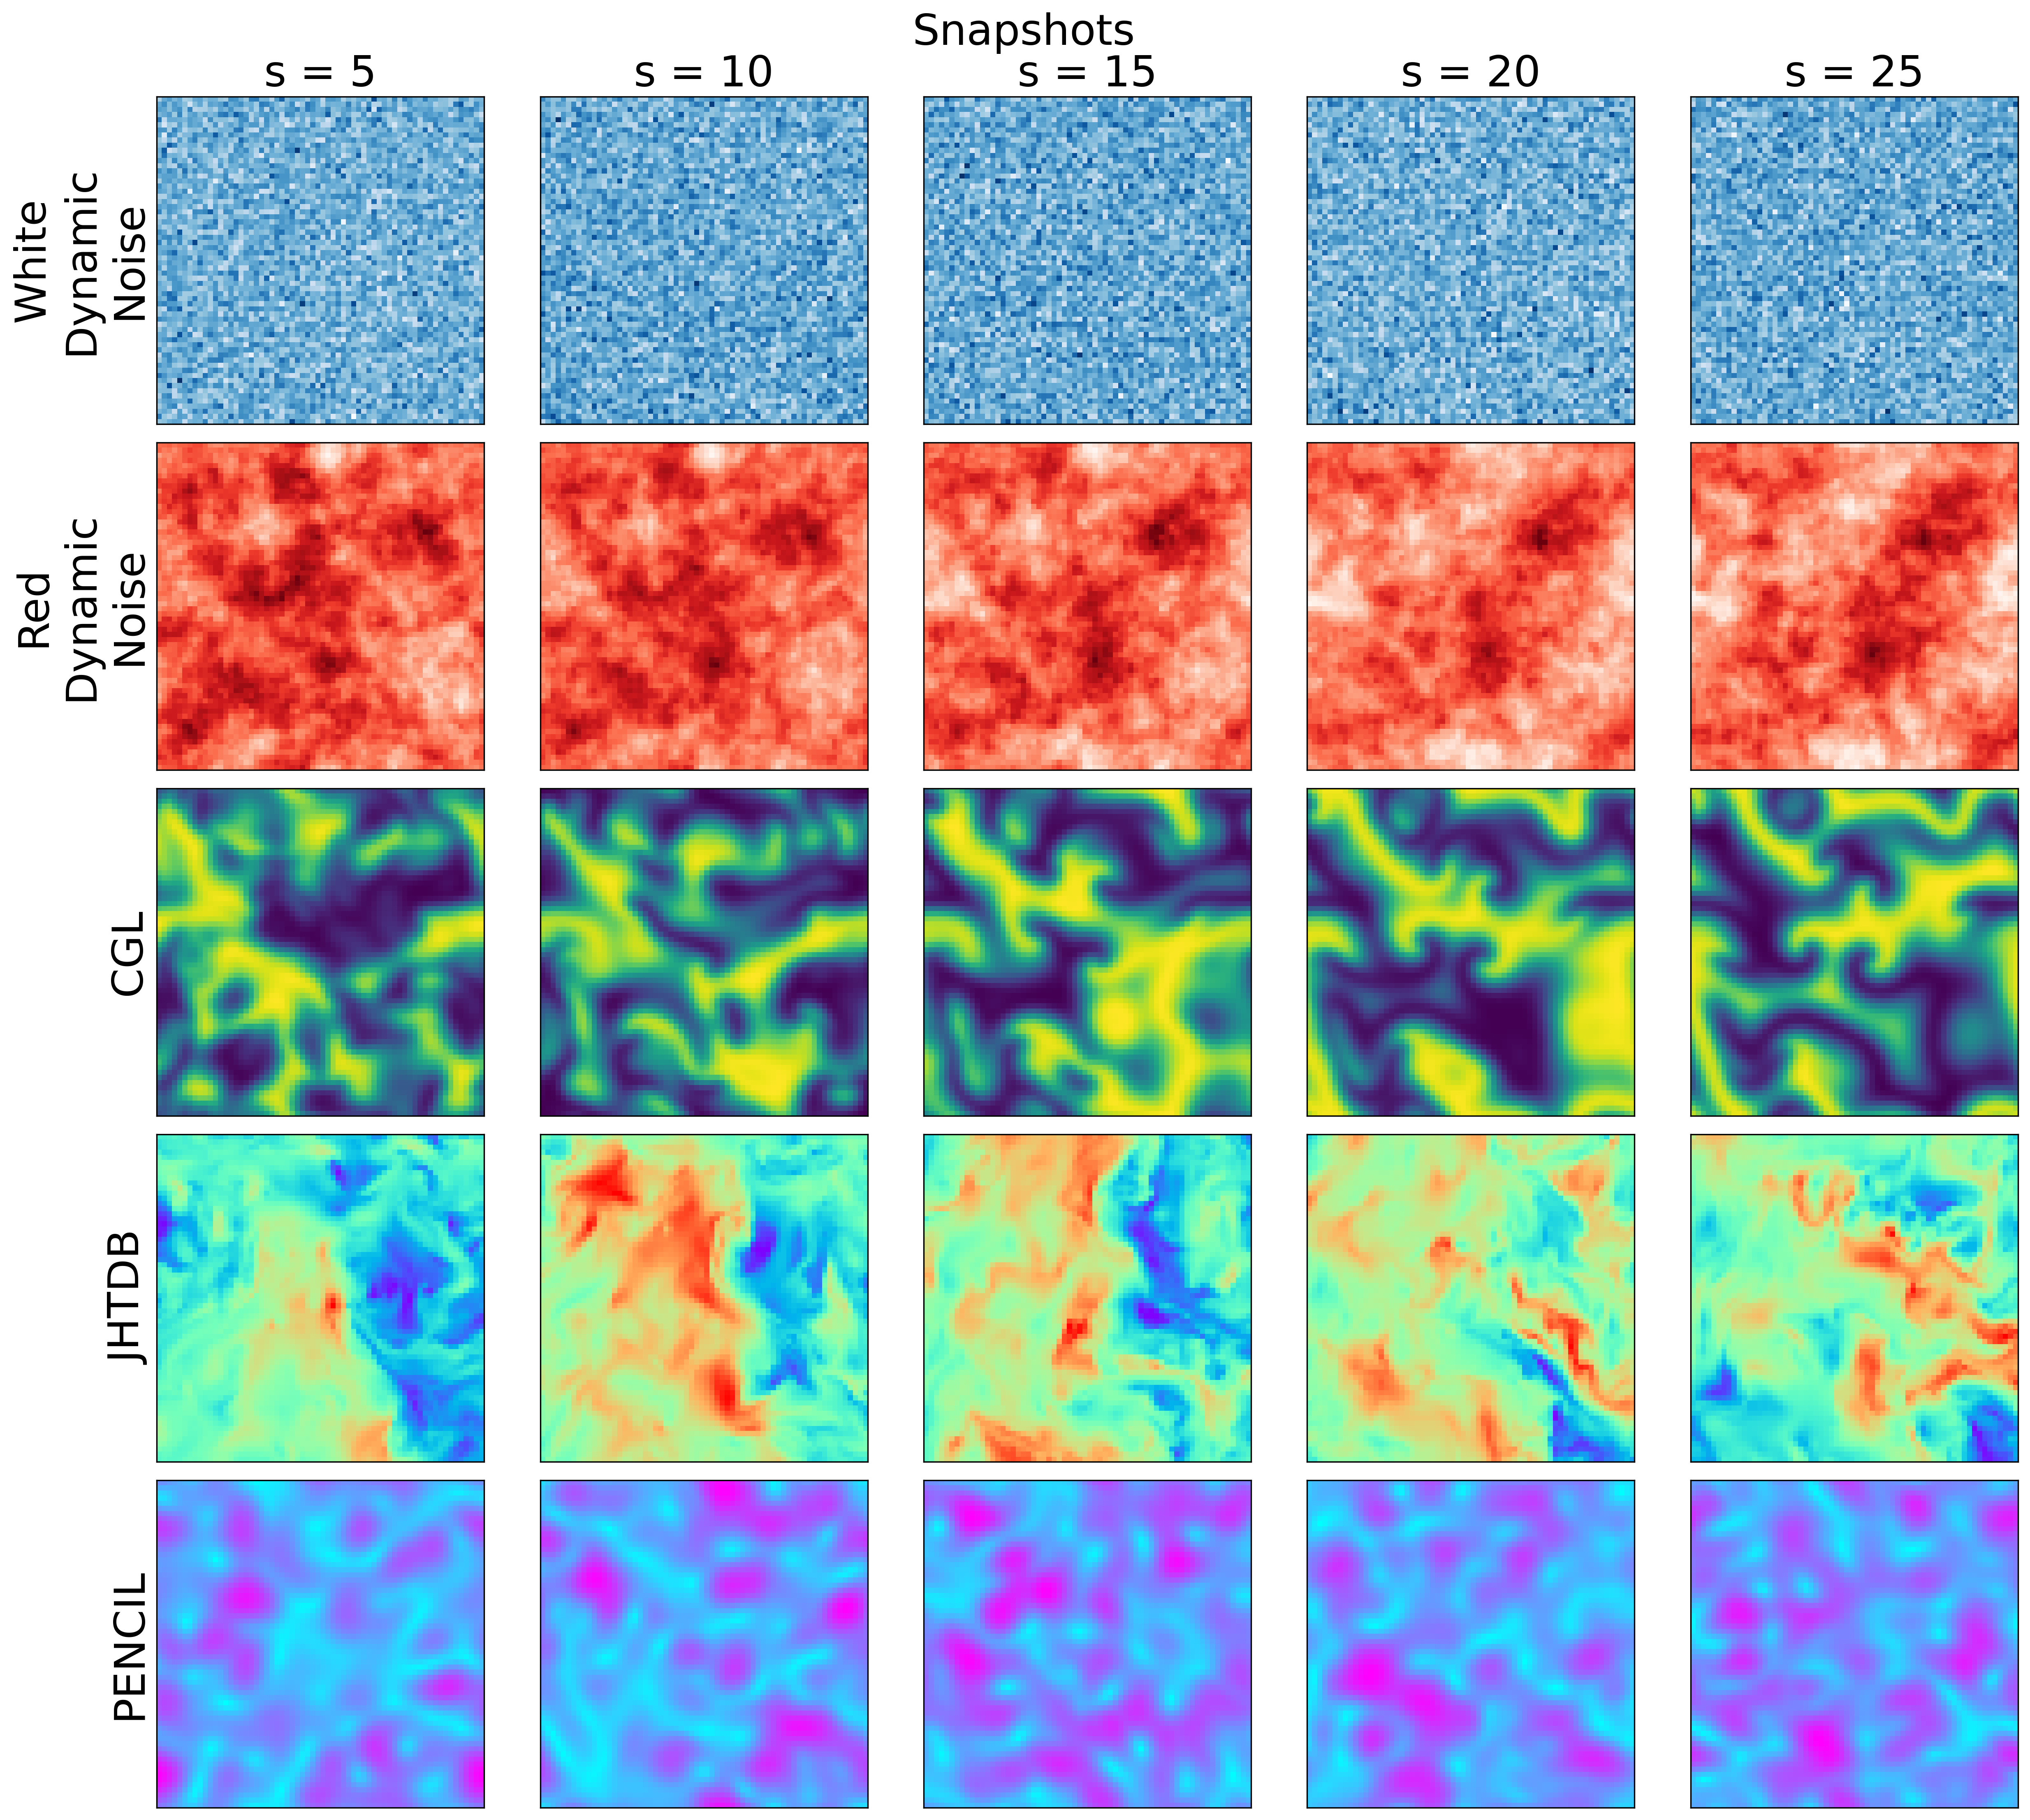

In [ ]:
from matplotlib.gridspec import GridSpec

seq = [5,10,15,20,25]
gs = GridSpec(5,5)
wdn = NCGL.cNoise(0,[25,64,64])
rdn = NCGL.cNoise(2,[25,64,64])

plt.figure(figsize=(17,15),dpi=300)
plt.suptitle("Snapshots",fontsize=25)
for i in range(0,len(seq)):
  plt.subplot(gs[0,i])
  plt.imshow(wdn[i],cmap='Blues')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('White\nDynamic\nNoise',fontsize=25)
  plt.title(f's = {seq[i]}',fontsize=25)

  plt.subplot(gs[1,i])
  plt.imshow(rdn[i],cmap='Reds')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('Red\nDynamic\nNoise',fontsize=25)


  plt.subplot(gs[2,i])
  scgl = np.genfromtxt(f"snapEvol/s{i}.csv")
  plt.imshow(scgl,cmap='viridis')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('CGL',fontsize=25)

  plt.subplot(gs[3,i])
  plt.imshow(getJHTDBIso(i),cmap='rainbow')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('JHTDB',fontsize=25)

  plt.subplot(gs[4,i])
  plt.imshow(readMod(i+1),cmap='cool')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('PENCIL',fontsize=25)



plt.tight_layout()
plt.savefig('all_data_vil.pdf')
plt.show()

# Analysis

In [ ]:
ga = GPA(0.0)

In [ ]:
cglH =[]
for i in tqdm.tqdm(range(25)):
  s = np.real(snap[-i])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  cglH.append(d)
cglH = pd.DataFrame(cglH)

100%|██████████| 25/25 [00:06<00:00,  4.01it/s]


In [ ]:
turbH = []
for i in range(1,26):
  s = readMod(i)
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  turbH.append(d)
turbH = pd.DataFrame(turbH)

In [ ]:
randomH = []
for i in range(25):
  s = NCGL.cNoise(0,[64,64])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  randomH.append(d)
randomH = pd.DataFrame(randomH)

In [ ]:
redNoiseH = []
noiseT = NCGL.cNoise(2,[64,64,25])
for i in range(25):
  s = noiseT[:,:,i]
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  redNoiseH.append(d)
redNoiseH = pd.DataFrame(redNoiseH)

In [ ]:
jhH =[]
for i in tqdm.tqdm(range(25)):
  s = getJHTDBIso(i).copy().astype(float)
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  jhH.append(d)
jhH = pd.DataFrame(jhH)

100%|██████████| 25/25 [00:24<00:00,  1.03it/s]


# Results

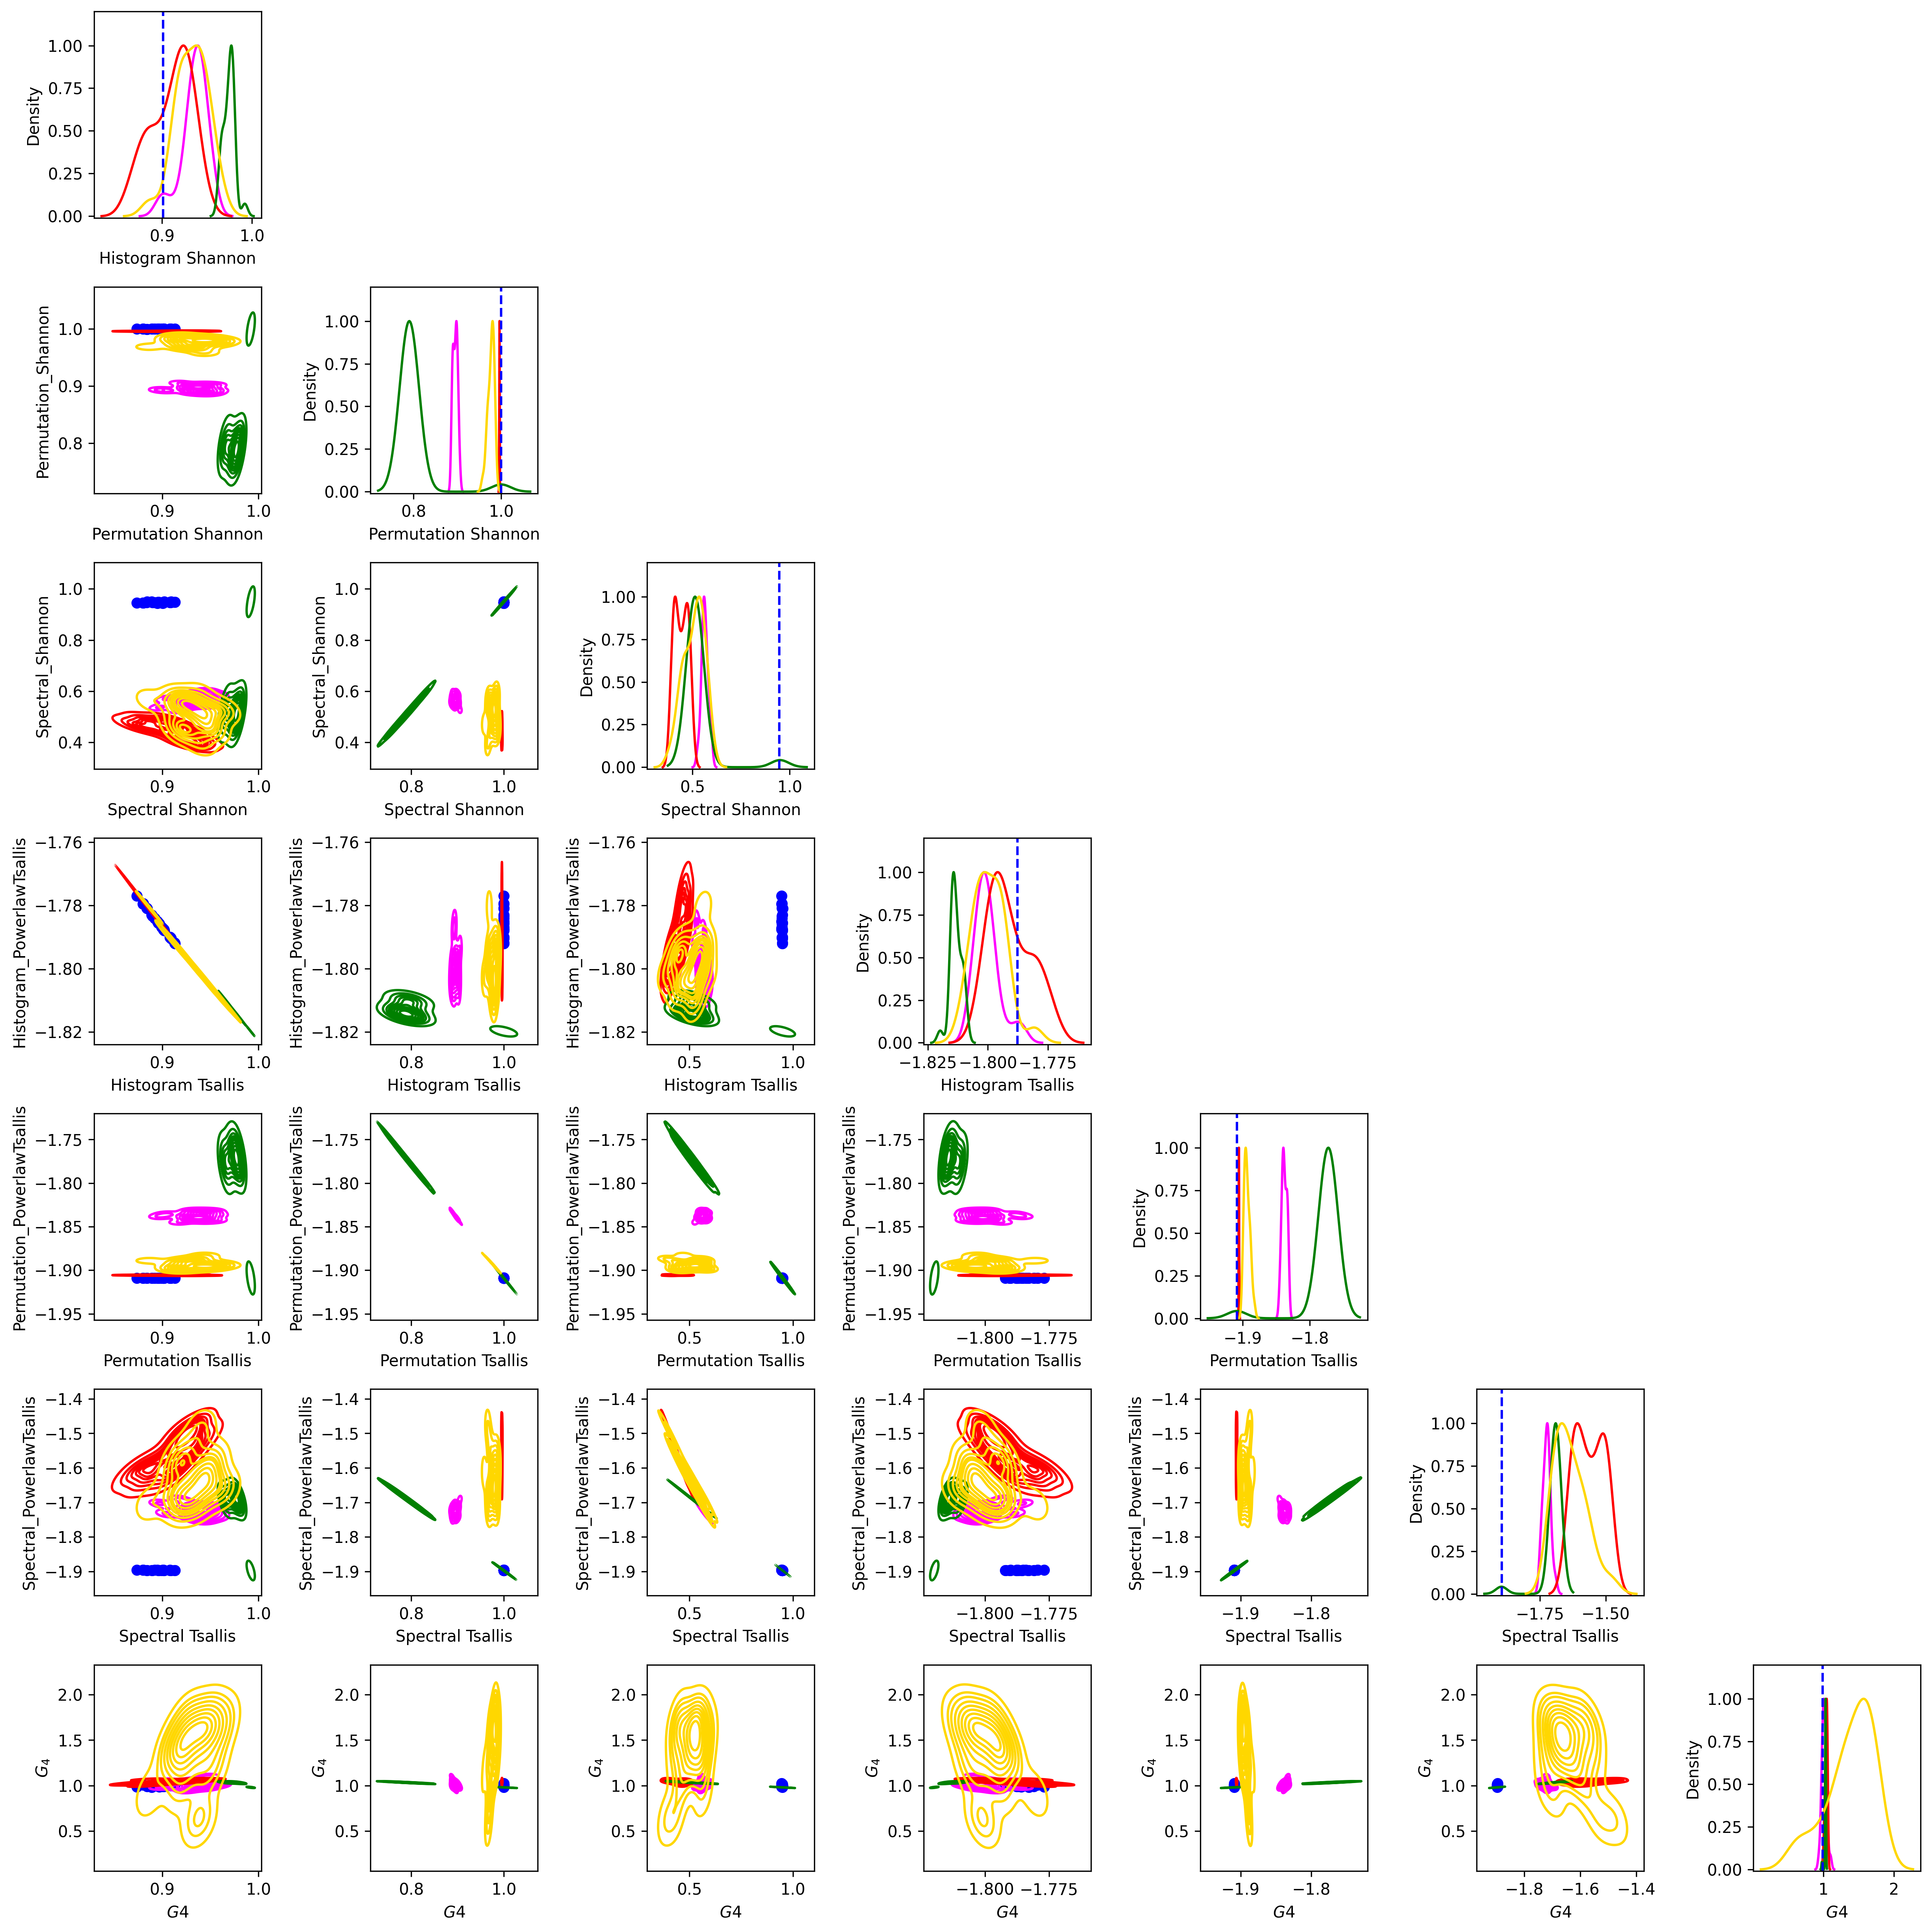

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


names = randomH.columns.values.copy()
# for i in range(len(names)): names[i]= names[i].replace('_', ' ').replace('Powerlaw','')
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17),dpi=300)
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        ax = sns.kdeplot(turbH[names[i]],color='magenta',common_norm=True)
        ax = sns.kdeplot(redNoiseH[names[i]],color='red',common_norm=True)
        ax = sns.kdeplot(cglH[names[i]],color='green',common_norm=True)
        ax = sns.kdeplot(jhH[names[i]],color='gold',common_norm=True)
        for line in ax.lines:
          line.set_ydata(normalize(line.get_ydata(),0,1))
        plt.axvline(randomH[names[i]].iloc[0],color='b',ls='--')
        plt.xlabel(names[i].replace('_', ' ').replace('Powerlaw',''))
        # plt.ylabel(names[j].replace('_', ' ').replace('Powerlaw',''))
        plt.ylim(-0.01,1.2)
      else:
        sns.kdeplot(turbH[[names[i],names[j]]],x=names[j],y=names[i]    ,color='magenta',fill=False)
        sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red'    ,fill=False)
        sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i]     ,color='green'  ,fill=False)
        sns.kdeplot(jhH[[names[i],names[j]]],x=names[j],y=names[i]      ,color='gold'   ,fill=False)
        plt.scatter(randomH[names[j]],randomH[names[i]]                 ,color='b')
        plt.xlabel(names[i].replace('_', ' ').replace('Powerlaw',''))
        # plt.ylabel(names[j].replace('_', ' ').replace('Powerlaw',''))
# legend_elements = [
#                     Patch(facecolor='blue',    edgecolor='blue'      ,label='White Dynamic Noise'),
#                     Patch(facecolor='red',     edgecolor='red'        ,label='Red Dynamic Noise'),
#                     Patch(facecolor='green',   edgecolor='green'    ,label='Weak Turbulence'),
#                     Patch(facecolor='gold',    edgecolor='gold'      ,label='Fully Developed Turbulence'),
#                     Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence')]


# plt.legend(handles=legend_elements,fontsize=14,loc='best',bbox_to_anchor=(0.5,-1))
plt.tight_layout()
plt.savefig('all_entropys_spaces.pdf')
plt.show()

In [ ]:
from sklearn import metrics
from scipy.stats import pearsonr

clusterName = []
silh = []
ij = []
names = randomH.columns.values.copy()
for j in range(len(names)):
  for i in range( j+1, len(names)):
    m1 = cglH[[names[i],names[j]]].sample(25)
    m2 = randomH[[names[i],names[j]]].sample(25)
    m3 = redNoiseH[[names[i],names[j]]].sample(25)
    m4 = turbH[[names[i],names[j]]].sample(25)
    m5 = jhH[[names[i],names[j]]].sample(25)

    m1["class"] = 1
    m2["class"] = 2
    m3["class"] = 3
    m4["class"] = 4
    m5["class"] = 5
    m = pd.concat([m1,m2,m3,m4,m5])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    silh.append(np.round(corr*sc,5))
    clusterName.append( names[i]+" x "+names[j])
    ij.append([i,j])
seq = np.argsort(silh)
# for i in seq:
  # print(clusterName[i], silh[i],ij[i])

In [ ]:
a = np.zeros((7,7))
for j in range(len(names)):
  for i in range( j+1, len(names)):

    m1 = cglH[[names[i],names[j]]].sample(25)
    m2 = randomH[[names[i],names[j]]].sample(25)
    m3 = redNoiseH[[names[i],names[j]]].sample(25)
    m4 = turbH[[names[i],names[j]]].sample(25)
    m5 = jhH[[names[i],names[j]]].sample(25)

    m1["class"] = 1
    m2["class"] = 2
    m3["class"] = 3
    m4["class"] = 4
    m5["class"] = 5
    m = pd.concat([m1,m2,m3,m4,m5])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    a[i,j] = corr*sc
    a[j,i] = corr*sc
    print(names[i],names[j], corr*sc)

Permutation_Shannon Histogram_Shannon 0.10059870153643745
Spectral_Shannon Histogram_Shannon 0.24491751909177392
Histogram_PowerlawTsallis Histogram_Shannon 0.00015589059200206586
Permutation_PowerlawTsallis Histogram_Shannon 0.0914129462095434
Spectral_PowerlawTsallis Histogram_Shannon 0.32748876393284226
$G_4$ Histogram_Shannon 0.2773620036178709
Spectral_Shannon Permutation_Shannon 0.41689187215003126
Histogram_PowerlawTsallis Permutation_Shannon 0.12920356098769362
Permutation_PowerlawTsallis Permutation_Shannon 0.00026050402894107756
Spectral_PowerlawTsallis Permutation_Shannon 0.5659208887360153
$G_4$ Permutation_Shannon 0.4248005651036602
Histogram_PowerlawTsallis Spectral_Shannon 0.2354534566261216
Permutation_PowerlawTsallis Spectral_Shannon 0.38104746515925947
Spectral_PowerlawTsallis Spectral_Shannon 0.02482077368786676
$G_4$ Spectral_Shannon 0.3918599200676599
Permutation_PowerlawTsallis Histogram_PowerlawTsallis 0.12336814091767391
Spectral_PowerlawTsallis Histogram_Powerl

<Figure size 1500x1200 with 0 Axes>

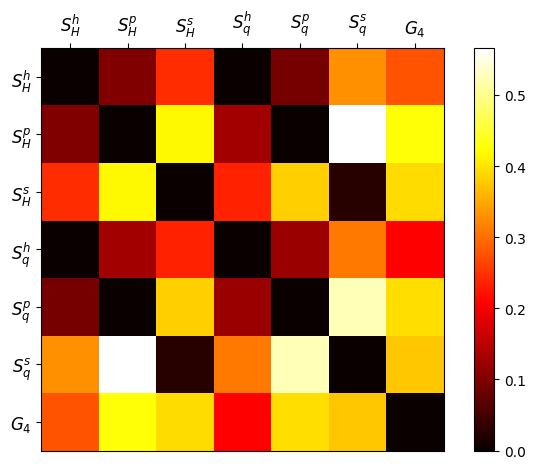

In [ ]:
plt.figure(figsize=(5,4),dpi=300)


fig, ax = plt.subplots()
cax= ax.imshow(a, cmap='hot')  # Plot the data

# Greek letters for labels
greek_letters = ['$S^h_H$', '$S^p_H$','$S^s_H$','$S^h_q$','$S^p_q$','$S^s_q$','$G_4$']

# Set the Greek letters as tick labels
ax.set_xticks(range(len(greek_letters)))
ax.set_yticks(range(len(greek_letters)))
ax.set_xticklabels(greek_letters,size=12)
ax.set_yticklabels(greek_letters,size=12)
# Move the x-axis tick labels to the top
ax.xaxis.set_ticks_position('top')

plt.colorbar(cax)
plt.tight_layout()
plt.savefig('Silhueta.pdf')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
<ipython-input-32-cad539cae506>:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


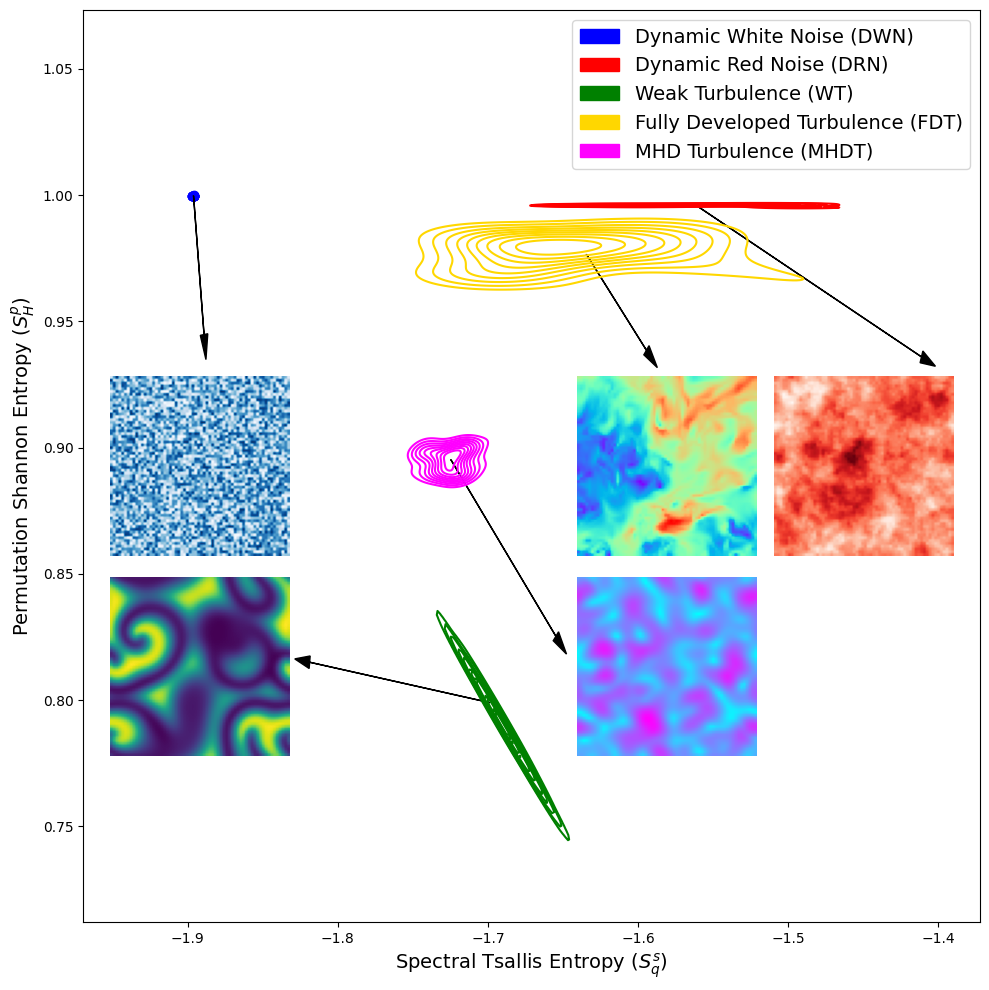

In [ ]:


i=1
j=5
plt.figure(figsize=(10,10))

# canonicos
plt.scatter(randomH[names[j]],randomH[names[i]],color='b')
sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red'    ,fill=False,thresh=.2,level=3)
sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i]     ,color='green'  ,fill=False,thresh=.2,level=3)
sns.kdeplot(jhH[[names[i],names[j]]],x=names[j],y=names[i]      ,color='gold'   ,fill=False,thresh=.2,level=3)
sns.kdeplot(turbH[[names[i],names[j]]],x=names[j],y=names[i]    ,color='magenta',fill=False,thresh=.2,level=3)

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=14)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=14)



# INSERT IMAGES
image1 = snap[0]
# image2 = m[1]
image3 = snap[-490]
image4 = getJHTDBIso(24)
image5 = readMod(5)

cmap1 = 'Blues'
cmap2 = 'Reds'
cmap4 = 'rainbow'
cmap5 = 'cool'

Width,Height = 1,1

delta = 0.22

img1x,img1y = -0.37,0
img2x,img2y = 0.37,0
img3x,img3y = -0.37,-delta
img4x,img4y = 0.15,0
img5x,img5y = 0.15,-delta

# Create axes for images
ax = plt.gca()
# ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center')
ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img1x, img1y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img2 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img2x, img2y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img3 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img3x, img3y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img4 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img4x, img4y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img5 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img5x, img5y, Width, Height),
                                    bbox_transform=ax.transAxes)

# Display images
ax_img1.imshow(image1,cmap=cmap1)
ax_img2.imshow(image2,cmap=cmap2)
ax_img3.imshow(image3)#,cmap=cmap3)
ax_img4.imshow(image4,cmap=cmap4)
ax_img5.imshow(image5,cmap=cmap5)

ax_img1.axis('off')
ax_img2.axis('off')
ax_img3.axis('off')
ax_img4.axis('off')
ax_img5.axis('off')

# Add arrows and annotations

head_width=0.005
head_length=0.01
width=0.00003


ax.arrow(randomH[names[j]][0],randomH[names[i]][0],
         0.007,-0.055,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(redNoiseH[[names[i],names[j]]].mean()[1],redNoiseH[[names[i],names[j]]].mean()[0],
         0.15,-0.06,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(cglH[[names[i],names[j]]].mean()[1],cglH[[names[i],names[j]]].mean()[0],
         -0.12,0.016,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(jhH[[names[i],names[j]]].mean()[1],jhH[[names[i],names[j]]].mean()[0],
         0.04,-0.038,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(turbH[[names[i],names[j]]].mean()[1],turbH[[names[i],names[j]]].mean()[0],
         0.07,-0.07,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')


legend_elements = [
                    Patch(facecolor='blue',    edgecolor='blue'      ,label='Dynamic White Noise (DWN)'),
                    Patch(facecolor='red',     edgecolor='red'        ,label='Dynamic Red Noise (DRN)'),
                    Patch(facecolor='green',   edgecolor='green'    ,label='Weak Turbulence (WT)'),
                    Patch(facecolor='gold',    edgecolor='gold'      ,label='Fully Developed Turbulence (FDT)'),
                    Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence (MHDT)')]


ax.legend(handles=legend_elements,fontsize=14)
plt.tight_layout()
plt.savefig('kde.pdf')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch

# legend_elements = [
#                     Patch(facecolor='blue', edgecolor='blue'      ,label='White Dynamic Noise'),
#                     Patch(facecolor='red', edgecolor='red'        ,label='Red Dynamic Noise'),
#                     Patch(facecolor='green', edgecolor='green'    ,label='Weak Turbulence'),
#                     Patch(facecolor='gold', edgecolor='gold'      ,label='Fully Developed Turbulence'),
#                     Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence'),


#                     #Line2D([0], [0], marker='o', color='w', label='PLUTO',markerfacecolor='k', markersize=15),
#                     #Line2D([0], [0], marker='o', color='w', label='CAMELIA',markerfacecolor='orange', markersize=15),
#                     #Line2D([0], [0], marker='*', color='w', label='Milli-Millenium',markerfacecolor='yellow',markeredgecolor='k', markersize=15),
#                    ]

# # Create the figure
# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center',fontsize=20)

# plt.show()

In [ ]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))

# plt.figure(figsize=(12,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=10, cmap='rainbow')
# plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
# plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
# plt.colorbar()

# plt.show()

In [ ]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))


# plt.figure(figsize=(10,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=100, cmap='rainbow')
# plt.xlim(-1.73,-1.67)
# plt.ylim(0.7825,0.825)
# plt.show()

In [ ]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))


# plt.figure(figsize=(10,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=100, cmap='rainbow')
# plt.xlim(-1.88,-1.92)
# plt.ylim(0.99,1.1)
# plt.show()

<ipython-input-37-0a1cd955b700>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


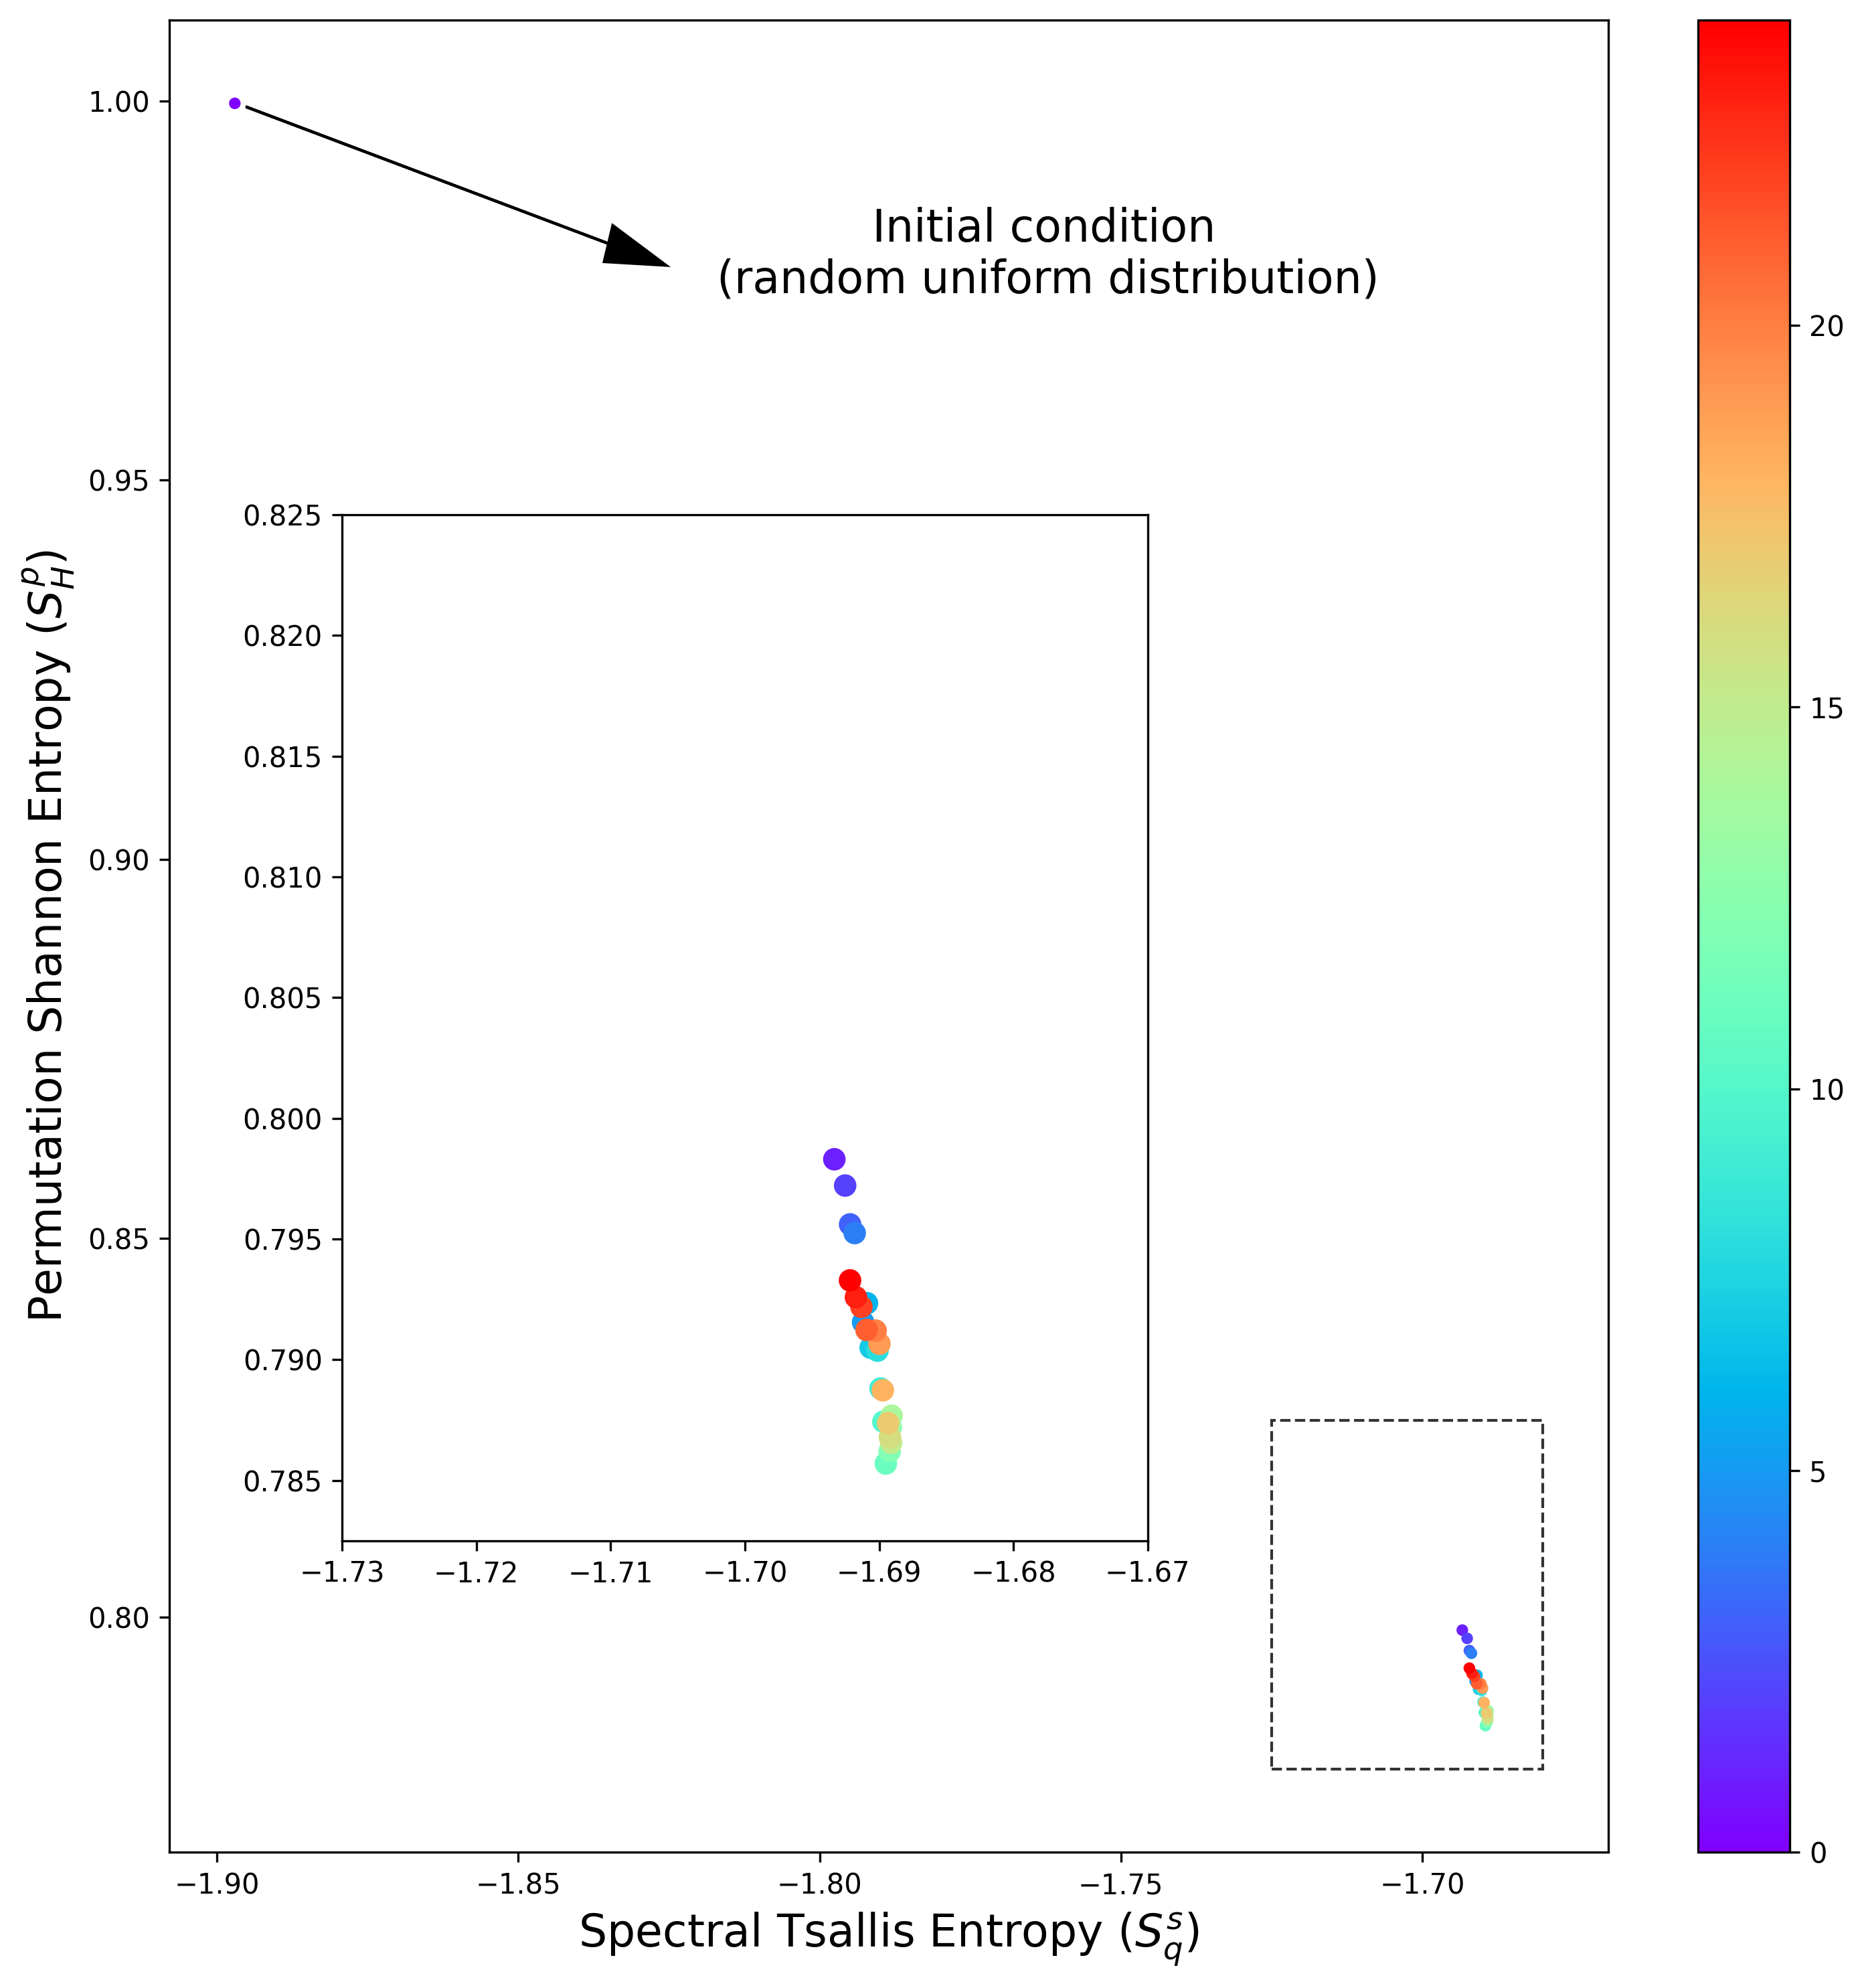

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=1
j=5

seq = np.arange(len(cglH[names[j]]))

# Assuming cglH is your DataFrame and names is a list of column names


# Create the main plot
plt.figure(figsize=(10, 10),dpi=300)
plt.scatter(cglH[names[j]], cglH[names[i]], c=seq, s=10, cmap='rainbow')

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=16)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=16)

plt.colorbar()

# Create an inset axes at a specific position
# bbox_to_anchor = [x, y, width, height]
# x, y, width, height are in figure fraction (0 to 1)
ax = plt.gca()
ax_inset = inset_axes(ax, width="70%", height="70%", loc='center',
                      bbox_to_anchor=[0.0, 0.05, 0.8,0.8], bbox_transform=ax.transAxes)

# Plot the zoomed-in view in the inset plot
ax_inset.scatter(cglH[names[j]], cglH[names[i]], c=seq, s=50, cmap='rainbow')
ax_inset.set_xlim(-1.73, -1.67)
ax_inset.set_ylim(0.7825, 0.825)

someX, someY = max(cglH[names[j]]), max(cglH[names[i]])
ax.add_patch(Rectangle((-1.725, 0.78), 0.045, 0.046, fill=None, alpha=0.8,linestyle='--'))

delta_x = 0.002
delta_y = 0.0005
ax.arrow(cglH[names[j]][0]+delta_x, cglH[names[i]][0]-delta_y,
         0.06,-0.018,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')
ax.text(cglH[names[j]][0]+0.08, cglH[names[i]][0]-0.025,'           Initial condition\n(random uniform distribution)',size=16)
plt.tight_layout()
plt.savefig('dynamical_analysis.pdf')
plt.show()


# CNMAC Aplication

## Data

In [ ]:
betas = [2,-1,0,1,2]

cube_noise = []
for i in range(len(betas)):
  cube_noise.append(NCGL.cNoise(betas[i],[25,64,64]))

In [ ]:
series_noise = []
for i in range(len(betas)):
  series_noise.append(NCGL.cNoise(betas[i],[25,1024]))

In [ ]:
np.shape(series_noise)


(5, 25, 1024)

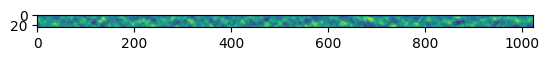

In [ ]:
plt.plot(series_noise[0][0])
plt.imshow(series_noise[0])

In [ ]:
color_maps = ['Purples','Blues','Greys','RdPu','Reds']
color_lines = ['violet','blue' ,'black'  ,'pink','red']

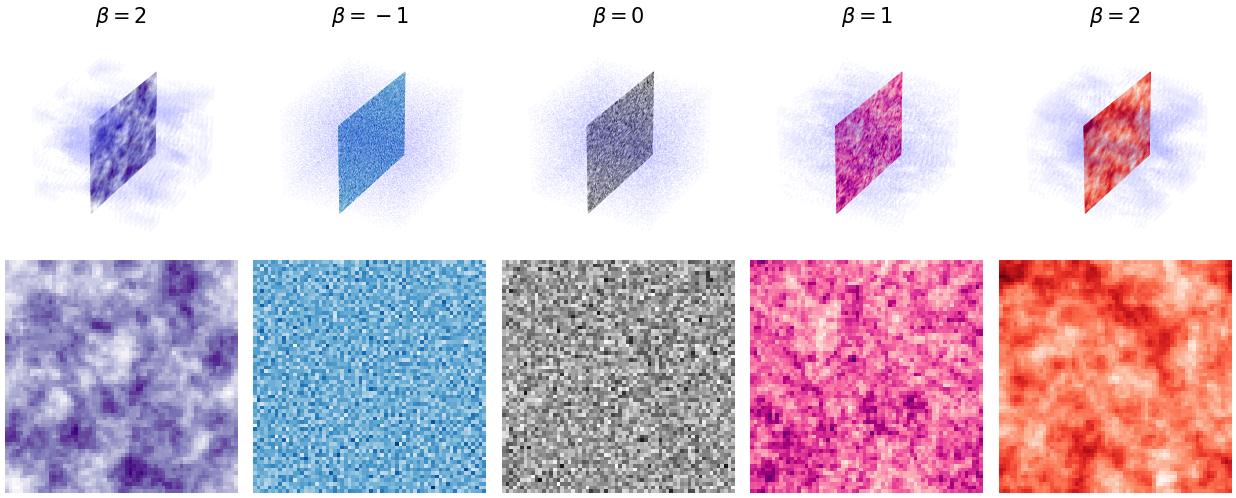

In [ ]:


# Create a larger figure for better visualization
fig = plt.figure(figsize=(25, 10),dpi=50)
# betas = np.linspace(1, 5, 5)

for i, beta in enumerate(betas):
    noise_cube = cube_noise[i]
    selected_slice =noise_cube.shape[0]//2

    # Plot 3D noise cube in the first row
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y, z = np.indices(noise_cube.shape)
    mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
    ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue',s=0.3)

    # Extract the selected slice for 3D plotting
    central_slice = noise_cube[selected_slice, :, :]
    Y, Z = np.meshgrid(range(64), range(64))
    X = np.full(Y.shape, selected_slice)

    # Plot the selected slice on the 3D plot
    # colors = plt.cm.viridis((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    color_map = getattr(plt.cm, color_maps[i])
    colors = color_map((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, shade=False,alpha=0.5)

    ax.set_title(f'$\\beta = {betas[i]:.0f}$',size=30)
    ax.axis('off')

    # Plot 2D slice in the second row
    ax2 = fig.add_subplot(2, 5, i+6)
    ax2.imshow(np.flipud(central_slice), cmap=color_maps[i])
    # ax2.set_title(f'$\\beta = {betas[i]:.2f}$')
    ax2.axis('off')

plt.tight_layout()
plt.savefig(f'cube_noise.png')

plt.show()


## Analyse

In [ ]:
def eta_df(cube,ranges):
  df =[]
  for i in tqdm.tqdm(range(ranges)):
    s = cube[i]
    d = eta.entropy(s)
    gpaRes = ga(s,moment=['G4'])
    d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
    df.append(d)
  return pd.DataFrame(df)


In [ ]:
ranges = np.shape(cube_noise)[1]
df_violet = eta_df(cube_noise[0],ranges)
df_blue   = eta_df(cube_noise[1],ranges)
df_white  = eta_df(cube_noise[2],ranges)
df_pink   = eta_df(cube_noise[3],ranges)
df_red    = eta_df(cube_noise[4],ranges)

100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(


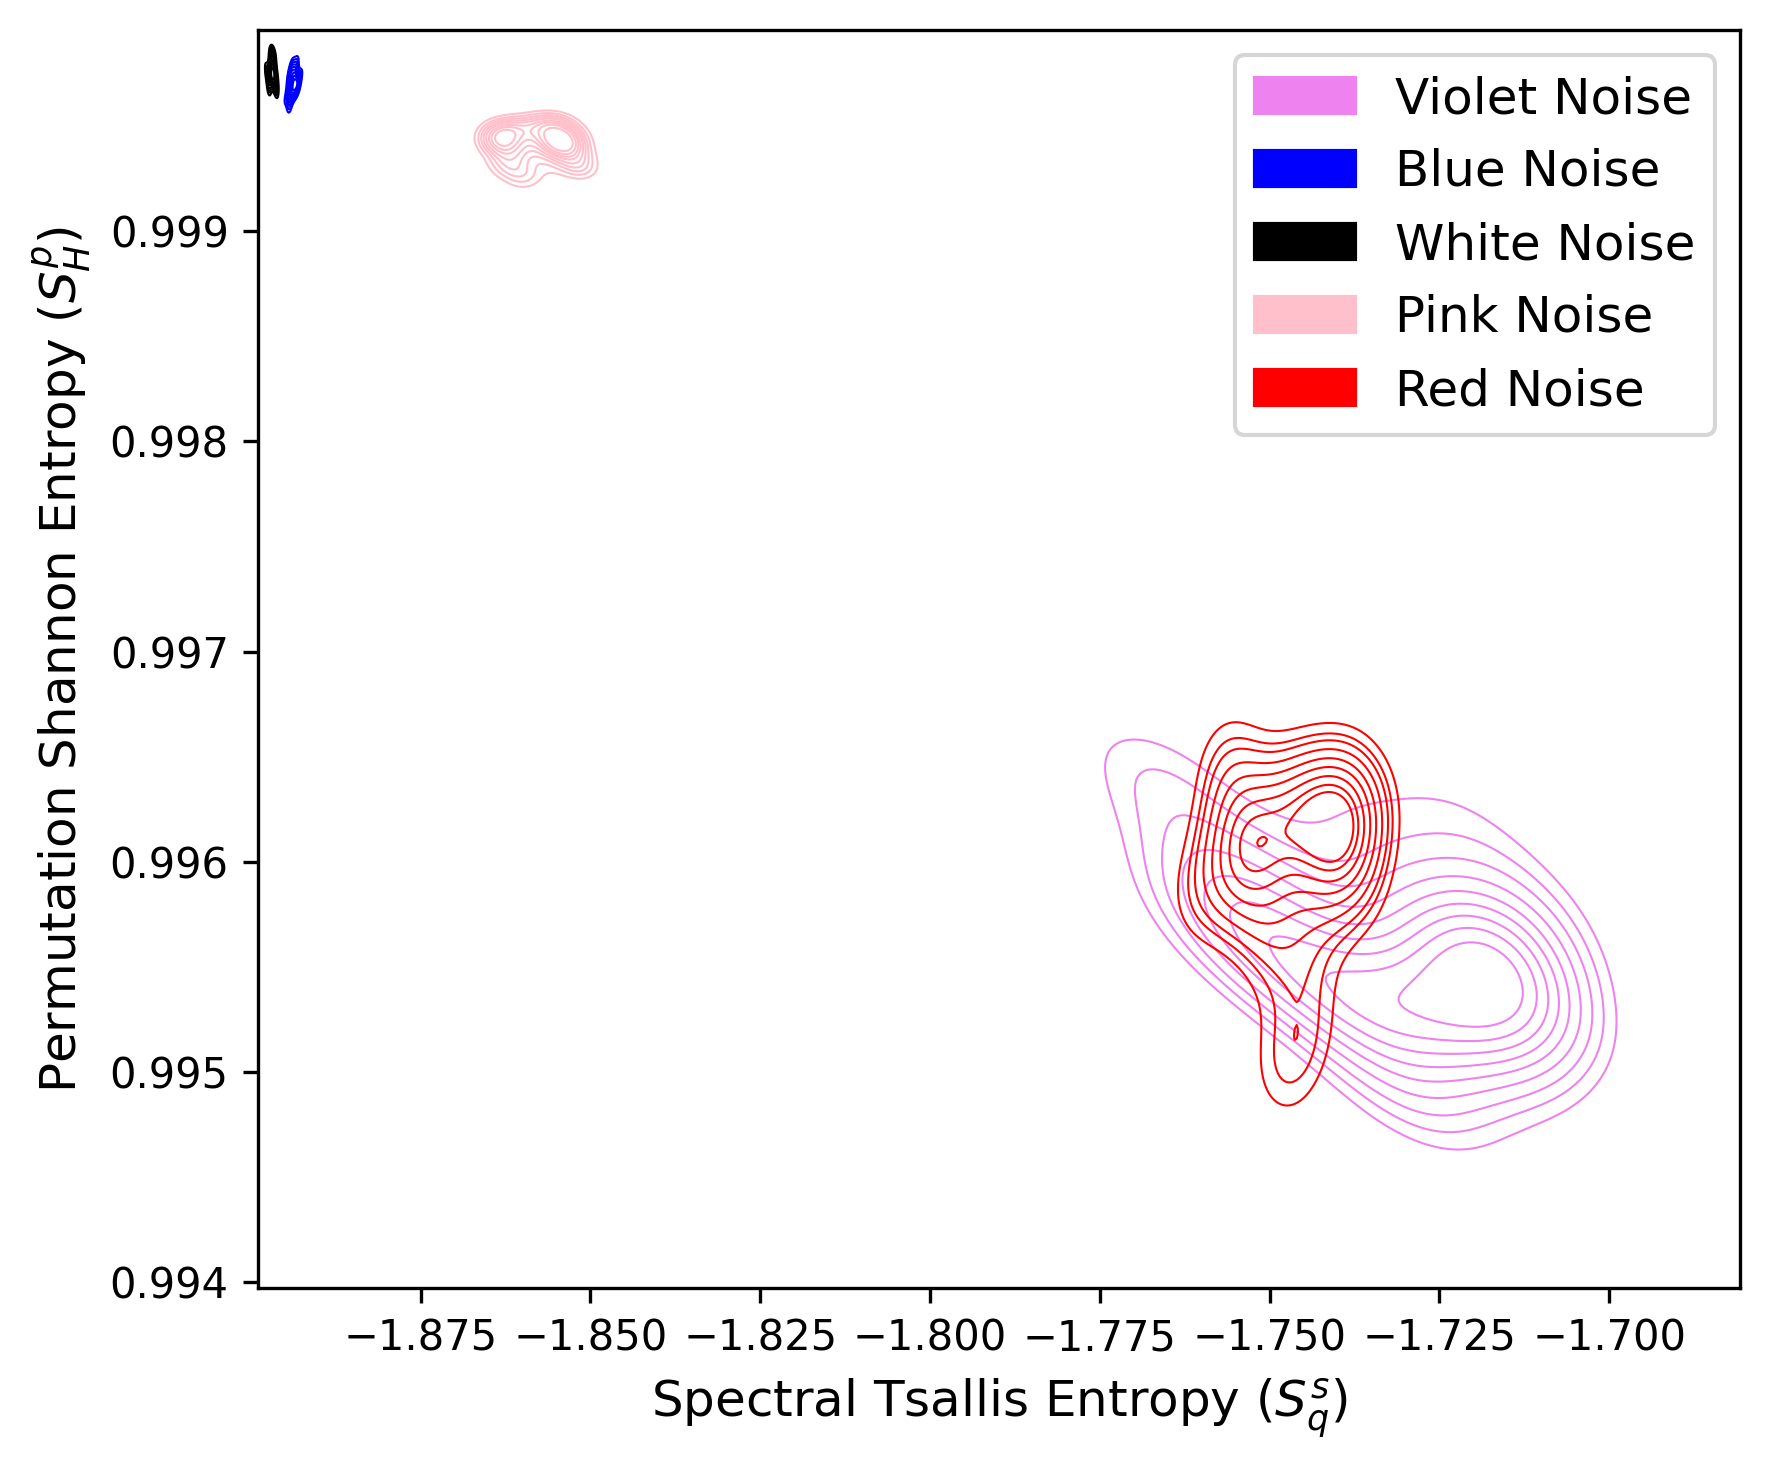

In [ ]:
i=1
j=5
fontsize = 12
plt.figure(figsize=(6,5),dpi=300)

# canonicos
# plt.scatter(randomH[names[j]],randomH[names[i]],color='b')

sns.kdeplot(df_violet[[names[i],names[j]]],x=names[j],y=names[i]  ,color= color_lines[0] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_blue[[names[i],names[j]]],x=names[j],y=names[i]    ,color= color_lines[1] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_white[[names[i],names[j]]],x=names[j],y=names[i]   ,color= color_lines[2] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_pink[[names[i],names[j]]],x=names[j],y=names[i]    ,color= color_lines[3] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_red[[names[i],names[j]]],x=names[j],y=names[i]     ,color= color_lines[4] ,fill=False,thresh=.2,level=3, linewidths=0.5)

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=fontsize)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=fontsize)



# # INSERT IMAGES
# image1 = cube_noise[0][selected_slice]
# image2 = cube_noise[1][selected_slice]
# image3 = cube_noise[2][selected_slice]
# image4 = cube_noise[3][selected_slice]
# image5 = cube_noise[4][selected_slice]

# cmap1 = color_maps[0]
# cmap2 = color_maps[1]
# cmap3 = color_maps[2]
# cmap4 = color_maps[3]
# cmap5 = color_maps[4]

# Width,Height = 1,1

# delta = 0.22

# img1x,img1y = -0.37,0
# img2x,img2y = 0.37,0
# img3x,img3y = -0.37,-delta
# img4x,img4y = 0.15,0
# img5x,img5y = 0.15,-delta

# # Create axes for images
ax = plt.gca()
# # ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center')
# ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img1x, img1y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img2 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img2x, img2y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img3 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img3x, img3y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img4 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img4x, img4y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img5 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img5x, img5y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# Display images
# ax_img1.imshow(image1,cmap=cmap1)
# ax_img2.imshow(image2,cmap=cmap2)
# ax_img3.imshow(image3,cmap=cmap3)
# ax_img4.imshow(image4,cmap=cmap4)
# ax_img5.imshow(image5,cmap=cmap5)

# ax_img1.axis('off')
# ax_img2.axis('off')
# ax_img3.axis('off')
# ax_img4.axis('off')
# ax_img5.axis('off')

# # Add arrows and annotations

# head_width=0.005
# head_length=0.01
# width=0.0000


# ax.arrow(randomH[names[j]][0],randomH[names[i]][0],
#          0.007,-0.055,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_red[[names[i],names[j]]].mean()[1],df_red[[names[i],names[j]]].mean()[0],
#          0.15,-0.06,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_blue[[names[i],names[j]]].mean()[1],df_blue[[names[i],names[j]]].mean()[0],
#          -0.12,0.016,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_white[[names[i],names[j]]].mean()[1],df_white[[names[i],names[j]]].mean()[0],
#          0.04,-0.038,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_pink[[names[i],names[j]]].mean()[1],df_pink[[names[i],names[j]]].mean()[0],
#          0.07,-0.07,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')


legend_elements = [
                    Patch(facecolor = color_lines[0],edgecolor=color_lines[0],label='Violet Noise'),
                    Patch(facecolor = color_lines[1],edgecolor=color_lines[1],label='Blue Noise'),
                    Patch(facecolor = color_lines[2],edgecolor=color_lines[2],label='White Noise'),
                    Patch(facecolor = color_lines[3],edgecolor=color_lines[3],label='Pink Noise'),
                    Patch(facecolor = color_lines[4],edgecolor=color_lines[4],label='Red Noise')]


ax.legend(handles=legend_elements,fontsize=fontsize)
plt.tight_layout()
plt.savefig('cube_kde_noise.pdf')
# plt.xlim(-2,-0.6)
# plt.ylim(0.4,1.05)
# plt.legend()
plt.show()

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr



In [ ]:
names

array(['Histogram_Shannon', 'Permutation_Shannon', 'Spectral_Shannon',
       'Histogram_PowerlawTsallis', 'Permutation_PowerlawTsallis',
       'Spectral_PowerlawTsallis', '$G_4$'], dtype=object)

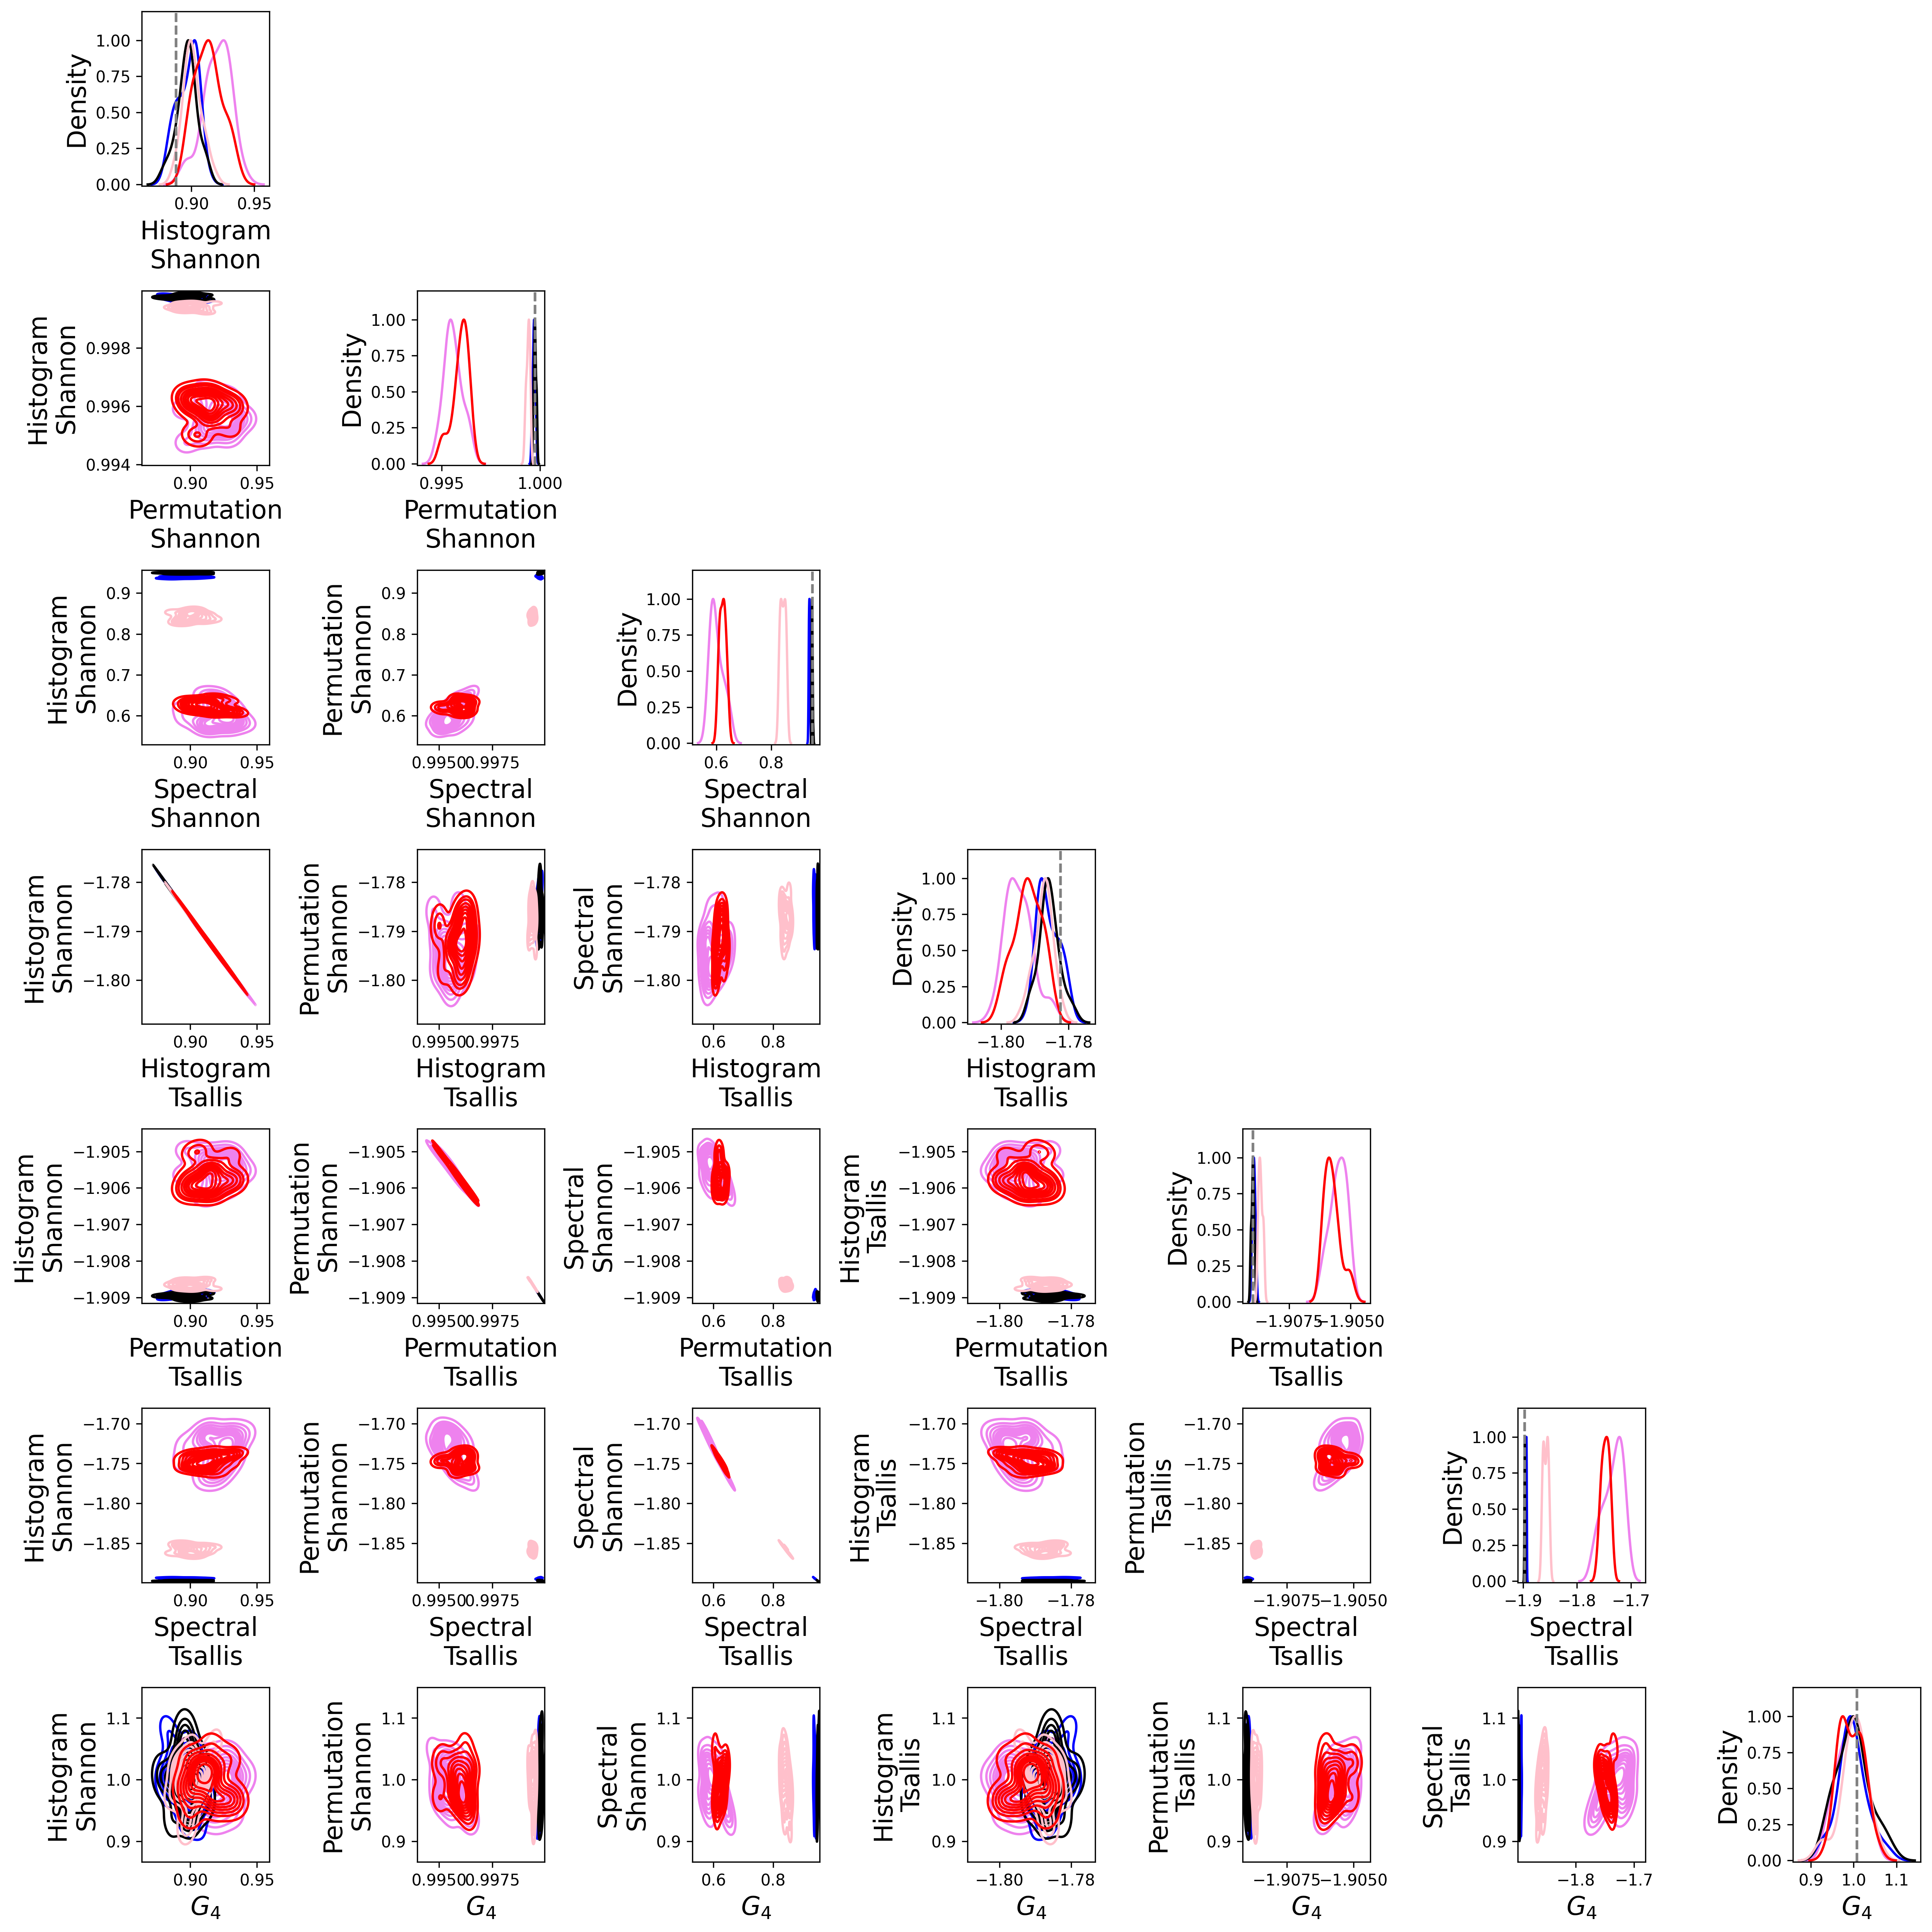

In [ ]:
fontsize = 16
names = df_violet.columns.values.copy()
# for i in range(len(names)): names[i]= names[i].replace('_', '\n').replace('Powerlaw','')
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17),dpi=300)
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        ax = sns.kdeplot(df_violet[names[i]],color='violet',common_norm=True)
        ax = sns.kdeplot(df_blue[names[i]]  ,color='blue'  ,common_norm=True)
        ax = sns.kdeplot(df_white[names[i]] ,color='black' ,common_norm=True)
        ax = sns.kdeplot(df_pink[names[i]]  ,color='pink'  ,common_norm=True)
        ax = sns.kdeplot(df_red[names[i]]   ,color='red'   ,common_norm=True)
        for line in ax.lines:
          line.set_ydata(normalize(line.get_ydata(),0,1))
          plt.axvline(df_white[names[i]].iloc[0],color='gray',ls='--')
        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)

        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel('Density',size=fontsize)
        plt.ylim(-0.01,1.2)
      else:
        sns.kdeplot(df_violet[[names[i],names[j]]],x=names[j],y=names[i],color='violet',fill=False)
        sns.kdeplot(df_blue[[names[i],names[j]]],x=names[j]  ,y=names[i],color='blue'  ,fill=False)
        sns.kdeplot(df_white[[names[i],names[j]]],x=names[j] ,y=names[i],color='black' ,fill=False)
        sns.kdeplot(df_pink[[names[i],names[j]]],x=names[j]  ,y=names[i],color='pink'  ,fill=False)
        sns.kdeplot(df_red[[names[i],names[j]]],x=names[j]   ,y=names[i],color='red'   ,fill=False)
        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)
          # plt.ylabel(names[j],size=fontsize)
        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel(names[j].replace('_', '\n').replace('Powerlaw',''),size=fontsize)

# plt.legend(handles=legend_elements,fontsize=14,loc='upper right',bbox_to_anchor=(0.5,1.9))
plt.tight_layout()
plt.savefig('cube_spaces.pdf')
plt.show()

# Radio Galaxies

In [ ]:
!wget -O RadioGalaxyDataset-v0.1.2.zip 'https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1'

--2024-05-14 15:24:24--  https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5071109 (4.8M) [application/octet-stream]
Saving to: ‘RadioGalaxyDataset-v0.1.2.zip’

RadioGalaxyDataset- 100%[===================>]   4.84M   974KB/s    in 5.5s    

2024-05-14 15:24:30 (903 KB/s) - ‘RadioGalaxyDataset-v0.1.2.zip’ saved [5071109/5071109]



In [ ]:
import zipfile
import os

# Replace 'RadioGalaxyDataset-v0.1.2.zip' with the path to your zip file
zip_path = 'RadioGalaxyDataset-v0.1.2.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
for dirname, _, filenames in os.walk('extracted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


extracted_data/floriangriese-RadioGalaxyDataset-7372637/.gitignore
extracted_data/floriangriese-RadioGalaxyDataset-7372637/README.md
extracted_data/floriangriese-RadioGalaxyDataset-7372637/LICENSE
extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/firstgalaxydata.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/__init__.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data_h5.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/Example_firstgalaxydata.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/img/Classification_Scheme.png
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/galaxy_data_different_labels.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/FRICat_Capetti_2017_relabeled.csv
ex

In [ ]:
!pip install -r /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
cd /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata

/content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata


In [ ]:
from firstgalaxydata import FIRSTGalaxyData

In [ ]:
data = FIRSTGalaxyData(root="./",input_data_list=["galaxy_data_h5.h5"])

FRI = []
FRII = []
Compact = []
Bent = []

for i in range(4):
  labels = np.ravel(data.labels)
  indices = np.where(labels == i)[0]
  numero_de_imagens = len(indices)
  print(f"Número de imagens para a classe {i}: {numero_de_imagens}")

  for j in range(numero_de_imagens):
        if   i == 0: FRI.append(data.data[np.where(labels==i)[0][j]])
        elif i == 1: FRII.append(data.data[np.where(labels==i)[0][j]])
        elif i == 2: Compact.append(data.data[np.where(labels==i)[0][j]])
        elif i == 3: Bent.append(data.data[np.where(labels==i)[0][j]])



Número de imagens para a classe 0: 395
Número de imagens para a classe 1: 824
Número de imagens para a classe 2: 291
Número de imagens para a classe 3: 248


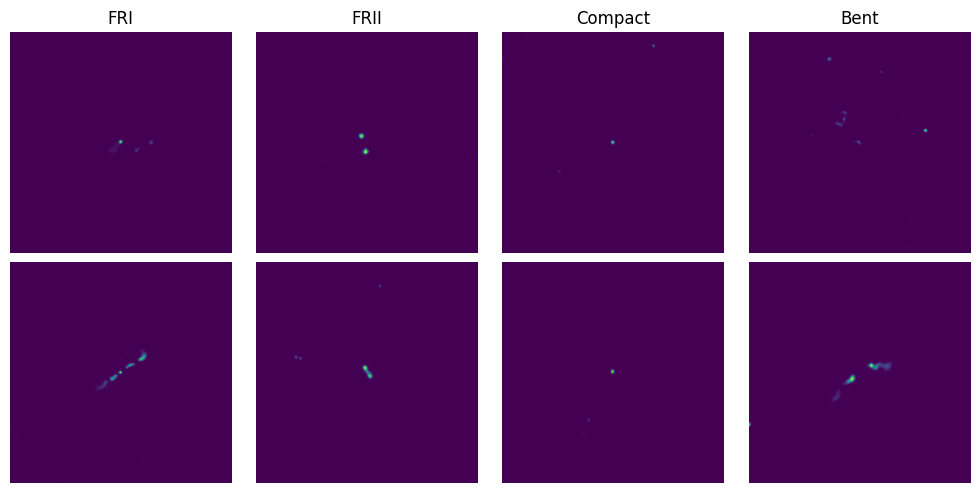

In [ ]:
plt.figure(figsize=(10,5))

all = [FRI,FRII,Compact,Bent]

for i in range(len(all)):
  plt.subplot(2,4,1+i)
  plt.title(data.class_dict[i])
  plt.imshow(all[i][0])
  plt.axis('off')

  plt.subplot(2,4,i+5)
  plt.imshow(all[i][1])
  plt.axis('off')
plt.tight_layout()

In [ ]:
np.max(FRI[1])

255

In [ ]:

str(eta.entropy(np.array(FRII[0])))

"{'Histogram_Shannon': 0.004202544374930911, 'Permutation_Shannon': 0.01743115597514478, 'Spectral_Shannon': 0.7260830078612759, 'Histogram_PowerlawTsallis': -0.9617761197479283, 'Permutation_PowerlawTsallis': -0.9672599819425791, 'Spectral_PowerlawTsallis': -1.9076990802901754}"

In [ ]:
from PIL import Image
import numpy as np

def resize(img_in,max_values=255,x_shape = 64,y_shape=64):
# Convertendo a matriz numpy para um objeto de imagem Pillow
  img = Image.fromarray((img_in * max_values).astype('uint8'))  # Escalando para valores de pixel de 0-255
  # Redimensionando a imagem para 64x64
  img_resized = np.array(img.resize((x_shape, y_shape), Image.LANCZOS))  # Usando o filtro LANCZOS para melhor qualidade
  return np.array(img_resized)


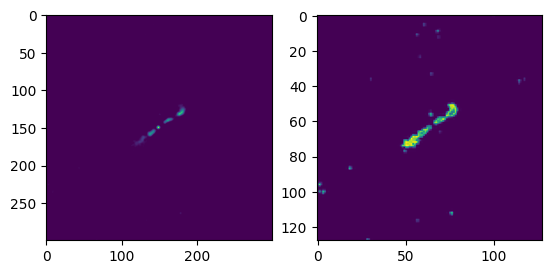

In [ ]:
i = 1
plt.subplot(1,2,1)
plt.imshow(FRI[i])
plt.subplot(1,2,2)
plt.imshow(resize(FRI[i],x_shape=128,y_shape=128))

In [ ]:
s = noiseT[:,:,12]
type(s),np.shape(s),np.max(s)

(numpy.ndarray, (64, 64), 0.9134935875636206)

In [ ]:
teste = FRI[0]/np.max(FRI[0])

In [ ]:
s = noiseT[:,:,i]
# d = eta.entropy(s)
# s = FRI[0]
s = FRI[0]/np.max(FRI[0])

gpaRes = ga(s,moment=['G4'])
gpaRes

{'G4': (1.0197963834334927-0.011463181279552325j)}

In [ ]:
s = noiseT[:,:,12]


In [ ]:
redNoiseH = []
noiseT = NCGL.cNoise(2,[64,64,25])
for i in range(25):
  s = noiseT[:,:,i]
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  redNoiseH.append(d)
redNoiseH = pd.DataFrame(redNoiseH)